# NUMPY LINEAR REGRESSION

# I. Tải và chuẩn hóa dữ liệu

In [1]:
# import thư viện numpy
import numpy as np
# import thư viện matplotlib
import matplotlib.pyplot as plt

# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_X = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/train_X.npy") 
data_y = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/train_y.npy")
data_test_X = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_X.npy")
data_test_y = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_y.npy")
 
# Chuẩn hóa dữ liệu
def normalizer(dataset):
    # Tìm giá trung bình của mỗi đặc trưng
    mu = np.mean(dataset,axis=0)
    # Tìm độ lệch chuẩn của mỗi đặc trưng
    sigma = np.std(dataset,axis=0)
 
    return(dataset - mu)/sigma

# Thêm cột giá trị bias cho dữ liệu
def bias_vector(features,labels):
    # Lấy số lượng mẫu
    n_training_samples = features.shape[0]
    # Lấy số lượng đặc trưng
    n_dim = features.shape[1]
    # Thêm vào cột bias (cột toàn giá trị 1) cho ma trận thuộc tính
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    # Chuyển ma trận nhãn về kích thước Nx1
    l = np.reshape(labels,[n_training_samples,1]) 
    return f, l

train_X = normalizer(data_X)
train_X, train_y = bias_vector(train_X, data_y)

print("Đã tải và chuẩn hóa dữ liệu")

Đã tải và chuẩn hóa dữ liệu


# II. Hàm tính Mean Square Error

In [2]:
def MSE(w, y, X):
    # Tìm kết quả dự đoán (np.dot tương đương phép nhân ma trận)
    predict = np.dot(X, w)
    # Tính mse theo công thức
    mse = np.sum(((y - predict)**2)/X.shape[0])
    return mse

# III. Hàm tính đạo hàm của các tham số

In [3]:
def Derivative(w, y, X):
    # Tìm kết quả dự đoán (np.dot tương đương phép nhân ma trận)
    predict = np.dot(X, w) 
    # Tính ma trận đạo hàm riêng của mỗi tham số trên cost 
    return (-2/X.shape[0])*(np.dot(X.T, y - predict))

# V. Train dữ liệu và tối ưu bằng BGD

epoch =  0 cost =  555.361302867195
epoch =  50 cost =  91.27844276609994
epoch =  100 cost =  33.158462206005154
epoch =  150 cost =  25.128471585663185
epoch =  200 cost =  23.81758565055716
epoch =  250 cost =  23.471824392209605
epoch =  300 cost =  23.303947329692306
epoch =  350 cost =  23.19336788713583
epoch =  400 cost =  23.113663687564426
epoch =  450 cost =  23.054423335657763
epoch =  500 cost =  23.009585122112604
epoch =  550 cost =  22.97511831374579
epoch =  600 cost =  22.948233612677747
epoch =  650 cost =  22.926967140122958
epoch =  700 cost =  22.909919421568
epoch =  750 cost =  22.896082333248742
epoch =  800 cost =  22.884721851120638
epoch =  850 cost =  22.875297618068274
epoch =  900 cost =  22.86740726288321
epoch =  950 cost =  22.860747559183718
epoch =  1000 cost =  22.855087144067767
epoch =  1050 cost =  22.850247229391044
epoch =  1100 cost =  22.846087873633163
epoch =  1150 cost =  22.84249814407317
epoch =  1200 cost =  22.839389015214458
epoch =  

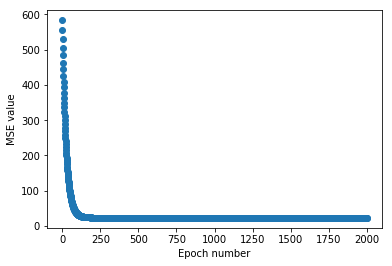

w_BGD =  [[22.33005952]
 [-0.6679163 ]
 [ 0.76808934]
 [-0.26318223]
 [ 0.32363753]
 [-2.11114549]
 [ 2.72690373]
 [ 0.52284912]
 [-2.8915456 ]
 [ 2.15763931]
 [-1.72257585]
 [-2.10096321]
 [ 0.54265567]
 [-3.97580414]]


In [4]:
# Định nghĩa tham số (parameter w) và siêu tham số (hyper parameter alpha) 
# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w_BGD = np.zeros((train_X.shape[1], 1))
# Khởi tạo learning rate
alpha = 0.01

all_mse = []

# Khởi tạo số vòng lặp
num = 2000
# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = MSE(w_BGD, train_y, train_X)
    all_mse.append(err)
    
    # Cập nhật w theo công thức gradient descent
    w_BGD = w_BGD - alpha*Derivative(w_BGD, train_y, train_X)
    
    if i % 50 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ", MSE(w_BGD, train_y, train_X))

print("epoch = ", i, "cost = ", MSE(w_BGD, train_y, train_X))
        
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_mse
plt.scatter(axis_x, axis_y)
plt.xlabel("Epoch number")
plt.ylabel("MSE value")
plt.show()

print("w_BGD = ", w_BGD)

# VI. Kiểm tra model được train và tối ưu bằng BGD

In [5]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_X.npy")
data_test_y = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_y.npy")

test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

print("MSE trên testset : ", MSE(w_BGD, test_y, test_X))

MSE trên testset :  21.99356717495397


# VII. Train dữ liệu và tối ưu bằng SGD

epoch =  0 cost =  583.5563392857143
epoch =  9 cost =  26.630407244844008


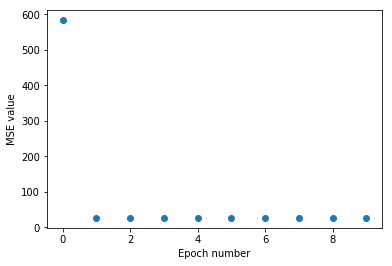

w_SGD =  [[22.26680404]
 [-1.11112113]
 [ 0.92125322]
 [-0.26667771]
 [ 1.79127805]
 [-2.61922876]
 [ 2.13733276]
 [ 1.17093496]
 [-3.18601121]
 [ 2.25643339]
 [-2.05794365]
 [-2.14240865]
 [ 0.91338439]
 [-4.78039351]]


In [8]:
# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w_SGD = np.zeros((train_X.shape[1], 1))

# list chứa tất cả mse
all_mse = []

# Khởi tạo số vòng lặp
num = 10
# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = MSE(w_SGD, train_y, train_X)
    all_mse.append(err)
    
    if i % 20 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ", MSE(w_SGD, train_y, train_X))
    
    # Duyệt qua mỗi điểm dữ trên tập train
    for j in range(train_X.shape[0]):
        # Cập nhật w theo công thức gradient descent
        w_SGD = w_SGD - alpha*Derivative(w_SGD, train_y[j].reshape(1, 1), train_X[j].reshape(1, train_X.shape[1]))

print("epoch = ", i, "cost = ", MSE(w_SGD, train_y, train_X))
        
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_mse
plt.scatter(axis_x, axis_y)
plt.xlabel("Epoch number")
plt.ylabel("MSE value")
plt.show()

print("w_SGD = ", w_SGD)

# VIII. Kiểm tra model được train và tối ưu bằng SGD

In [10]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_X.npy")
data_test_y = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_y.npy")

test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

print("MSE trên testset = ", MSE(w_SGD, test_y, test_X))

MSE trên testset =  23.000837973053684


# IX. Train dữ liệu và tối ưu bằng mini-BGD

epoch =  0 , cost =  583.5563392857143
epoch =  20 , cost =  44.91136888443711
epoch =  40 , cost =  24.695061319561262
epoch =  60 , cost =  23.519376145563882
epoch =  80 , cost =  23.254250492521003
epoch =  99 , cost =  23.11278295160363


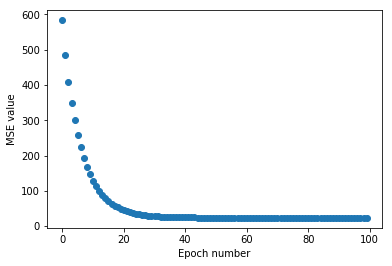

w_mBGD =  [[22.32735454]
 [-0.48807421]
 [ 0.56972444]
 [-0.64251398]
 [ 0.39108826]
 [-1.4892908 ]
 [ 3.02209757]
 [ 0.29404207]
 [-2.53193506]
 [ 1.17015508]
 [-0.86413178]
 [-1.90235055]
 [ 0.57024074]
 [-3.77164466]]


In [11]:
# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w_mBGD = np.zeros((train_X.shape[1], 1))

# list chứa tất cả mse
all_mse = []

# Thiết lập batch size
batch_size = 84

# Khởi tạo số vòng lặp
num = 100
# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = MSE(w_mBGD, train_y, train_X)
    all_mse.append(err)
    
    if i % 20 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, ", cost = ", MSE(w_mBGD, train_y, train_X))
    
    # Duyệt qua từng khối dữ liệu được chia nhỏ với kích thước batch_size
    for j in range(0, train_X.shape[0], batch_size):
        # Cập nhật w theo công thức gradient descent
        w_mBGD = w_mBGD - alpha*Derivative(w_mBGD, train_y[j:j+batch_size].reshape(batch_size, 1), train_X[j:j+batch_size].reshape(batch_size, train_X.shape[1]))

print("epoch = ", i, ", cost = ", MSE(w_mBGD, train_y, train_X))
        
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_mse
plt.scatter(axis_x, axis_y)
plt.xlabel("Epoch number")
plt.ylabel("MSE value")
plt.show()

print("w_mBGD = ", w_mBGD)

# X. Kiểm tra model được train và tối ưu bằng mini-BGD

In [12]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_X.npy")
data_test_y = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_y.npy")

test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

print("MSE trên testset = ", MSE(w_mBGD, test_y, test_X))

MSE trên testset =  22.473961343640404


# XI. Train dữ liệu và tối ưu bằng Basic Normal Equations:

In [18]:
# Giải ▽MSE(w) = 0
# Ta có: E(w) = ||y – WX||2
# ▽MSE(w) = 2XT (XW – y) = 0
# ⟺ XTXW = XTy
# ⟺ W = (XTX)-1XTy.
# Bộ tham số w = (w0,... ,wi) = ((XT. X)^-1 ). XT. y
x = train_X
y = train_y

xT = np.transpose(x)
# print("\nxT =\n",xT)

xTx = np.array(xT.dot(x))
# print("\nxT.x=\n",xTx)

xTx_1 = np.linalg.inv(xTx)
# print("\n(xT.x)^-1=\n",xTx_1)

xTx_1_xT = np.array(xTx_1.dot(xT))
# print("\n(xT.x)^-1.xT=\n",xTx_1_xT)

xTx_1_xT_y = np.array(xTx_1_xT.dot(y))
print("w_NE = ",xTx_1_xT_y)

w_NE =  [[22.33005952]
 [-0.68002615]
 [ 0.78172463]
 [-0.20132047]
 [ 0.31621891]
 [-2.12073671]
 [ 2.71913436]
 [ 0.52554617]
 [-2.88438238]
 [ 2.28644062]
 [-1.87282741]
 [-2.10662869]
 [ 0.54255769]
 [-3.97540854]]


# XII. Kiểm tra model được train và tối ưu bằng Basic Normal Equations:

In [20]:
# Tải dữ liệu data X và y đã được xử lý thành ma trận
data_test_X = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_X.npy")
data_test_y = np.load("F:/HK4/ML/Case_Study_#2/Boston_Housing_Data/test_y.npy")

test_X = normalizer(data_test_X)
test_X, test_y = bias_vector(test_X, data_test_y)

print("MSE trên testset = ", MSE(xTx_1_xT_y, test_y, test_X))

MSE trên testset =  21.94371258817937
